<a href="https://colab.research.google.com/github/YousefAbua/Intro-To-ML/blob/main/Homework2/PreProcessing_Q2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW2_Question2 (Preprocessing: Normalization with MIN/MAX)

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Import and read file
file_path = '/content/drive/My Drive/Intro to ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing_STD = housing

# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

# Paramters that are strings
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

# Parameters for part Q1_a and Q1_b
varlist1 = ['area','bedrooms','bathrooms','stories','parking']
varlist2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

# Binary map to convery strings to numerical values in chart
def binary_map(x):
  return x.map({'yes' : 1, 'no' : 0})

# Applying binary map
housing[varlist] = housing[varlist].apply(binary_map)

scaler = preprocessing.MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Preprocessing the output resulted in a better gradient descent
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,furnished
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,furnished
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,semi-furnished
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,furnished
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,furnished


In [9]:
# Randomize split for train and validation set
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_train.pop('price')
y_test = df_test.pop('price')

# Initlize Theta
theta1 = np.zeros(6)
theta2 = np.zeros(12)

Y = y_train.values
V_Y = y_test.values

train_size = len(df_train)
valid_size = len(df_test)

X_A = np.c_[np.ones((train_size, 1)), df_train[varlist1]]
VX_A = np.c_[np.ones((valid_size, 1)), df_test[varlist1]]

X_B = np.c_[np.ones((train_size, 1)), df_train[varlist2]]
VX_B = np.c_[np.ones((valid_size, 1)), df_test[varlist2]]

In [10]:
def compute_cost(X, Y, theta, size):
  '''
  X : 2D array training samples
  Y : 1D array target values
  Theta: parameters

  returns:
  J : Cost of parameters
  '''
  # Multiply X matrix with Theta matrix (hypothesis function)
  predictions = X.dot(theta)
  # Perform [1/(2m)(h-y)^2] to find loss function
  errors = np.subtract(predictions,Y)
  sqrErrors = np.square(errors)
  J = 1/(2*size) * np.sum(sqrErrors)
  return J

def gradient_descent(X, Y, theta, alpha, iteration, XV, YV):
  '''
  X : 2D array training samples
  Y : 1D array target values
  Theta: parameters
  Alpha: learning rate
  Iterations : number of iterations

  returns:
  Theta: updated parameters
  cost_history: cost from each iteration
  accuracy: validation set
  '''
  cost_history = np.zeros(iteration)
  accuracy = np.zeros(iteration)

  for i in range(iteration):
    # perform gradient descent formula
    #
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha / train_size) * X.transpose().dot(errors)
    theta -= sum_delta
    cost_history[i] = compute_cost(X, Y, theta, train_size)
    accuracy[i] = compute_cost(XV, YV, theta, valid_size)

  return theta, cost_history, accuracy

In [11]:
alpha = 0.01
iteration = 1500

theta1, cost_history1, accuracy1 = gradient_descent(X_A, Y, theta1, alpha, iteration, VX_A, V_Y)
theta2, cost_history2, accuracy2 = gradient_descent(X_B, Y, theta2, alpha, iteration, VX_B, V_Y)

print(theta1)

[2845462.1123613  1963191.03809288 1420700.23529282 1609868.88252026
 1645826.31839153 1429053.84250345]


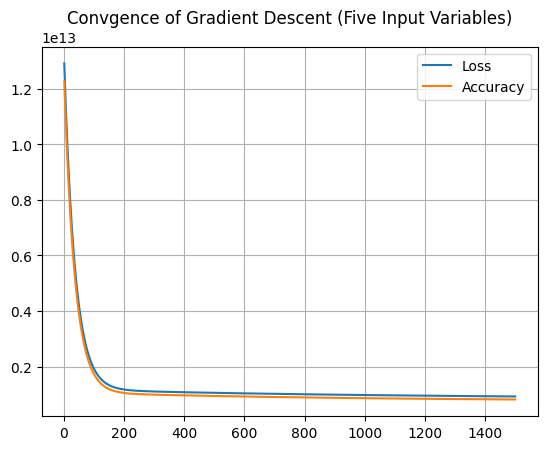

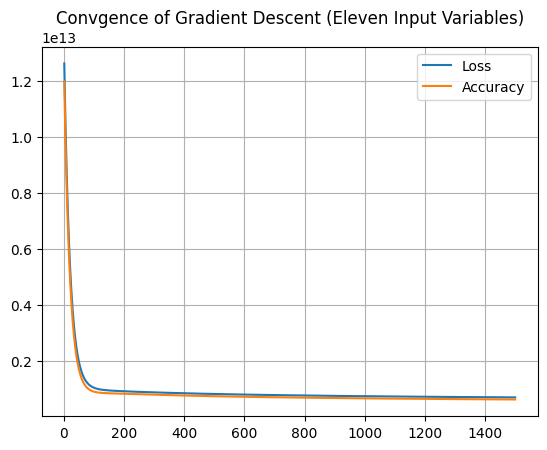

In [12]:
plt.plot(range(1, iteration+1), cost_history1, label = 'Loss');
plt.plot(range(1, iteration+1), accuracy1, label = 'Accuracy');
plt.grid(True)
plt.title("Convgence of Gradient Descent (Five Input Variables)")
plt.legend()
plt.show()

plt.plot(range(1, iteration+1), cost_history2, label = 'Loss');
plt.plot(range(1, iteration+1), accuracy2, label = 'Accuracy');
plt.grid(True)
plt.title("Convgence of Gradient Descent (Eleven Input Variables)")
plt.legend()
plt.show()